In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.shape

(891, 12)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# forward fill, since there are not too many missing values
train_df.Embarked = train_df['Embarked'].fillna(method = 'ffill')

In [8]:
# Calculate the frequency of each value in Age column 
s = train_df['Age'].value_counts(normalize = True)
# check if the passenger's age is missing
train_missing_age = train_df['Age'].isnull()
train_df.loc[train_missing_age,'Age'] = np.random.choice(s.index, size = len(train_df[train_missing_age]), p=s.values)

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
#extract their title from their name 
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

In [11]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [12]:
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [13]:
# replace those rare titles with 'Rare'
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Mlle','Ms', 'Mme'], 'Rare')

train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [14]:
# check survive rate group by their title 
train_df[['Title','Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


In [15]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

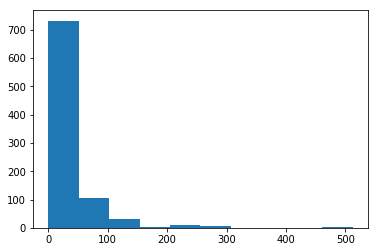

In [16]:
plt.hist(train_df['Fare']) 

In [17]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)

(array([ 67.,  55., 224., 215., 144.,  91.,  56.,  27.,  10.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

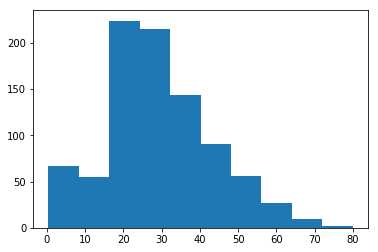

In [18]:
plt.hist(train_df['Age']) 

In [19]:
train_df['AgeBin'] = pd.cut(train_df['Age'], 5)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [24]:
onehot_features = ['Title','Sex','Embarked','AgeBin','FareBin']

In [66]:
enc.fit(train_df[onehot_features])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [26]:
enc.categories_

[array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([Interval(0.34, 16.336, closed='right'),
        Interval(16.336, 32.252, closed='right'),
        Interval(32.252, 48.168, closed='right'),
        Interval(48.168, 64.084, closed='right'),
        Interval(64.084, 80.0, closed='right')], dtype=object),
 array([Interval(-0.001, 7.91, closed='right'),
        Interval(7.91, 14.454, closed='right'),
        Interval(14.454, 31.0, closed='right'),
        Interval(31.0, 512.329, closed='right')], dtype=object)]

In [67]:
enc_res = enc.transform(train_df[onehot_features])
print(enc_res.toarray())

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [31]:
final_feature = ['Pclass','FamilySize']
train_onehot_added = pd.DataFrame(enc_res.toarray())
train_all_x = pd.concat([train_df[final_feature],train_onehot_added],axis = 1)

In [32]:
train_all_x.head()

,Pclass,FamilySize,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,3,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
train_all_x.isnull().sum()

Pclass        0
FamilySize    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
dtype: int64

In [37]:
train_y = train_df['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [38]:
#seperate Train and Validation set
xTrain, xVal, yTrain, yVal = train_test_split(train_all_x, train_y, test_size = 0.3, random_state = 1)

In [39]:
xTrain.shape, xVal.shape, yTrain.shape, yVal.shape

((623, 21), (268, 21), (623,), (268,))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [41]:
logr = LogisticRegression()
rf = RandomForestClassifier()

In [49]:
logr.fit(xTrain, yTrain)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
param_grid = {
    'max_depth': [7,10,13,15,17],
    'max_features': [5,7,10],
    'min_samples_split': [2,5,10],
    'n_estimators': [10,20,50]
}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 10)
rf_grid.fit(xTrain,yTrain)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7, 10, 13, 15, 17], 'max_features': [5, 7, 10], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rf_grid.best_score_

0.8507223113964687

In [50]:
y_pred_train_logr = logr.predict(xTrain)
y_pred_Val_logr = logr.predict(xVal)

In [51]:
np.mean(y_pred_train_logr == yTrain), np.mean(y_pred_Val_logr == yVal)

(0.841091492776886, 0.7985074626865671)

In [70]:
y_pred_train_rf = rf_grid.predict(xTrain)
y_pred_Val_rf = rf_grid.predict(xVal)
np.mean(y_pred_train_rf == yTrain), np.mean(y_pred_Val_rf == yVal)

(0.8908507223113965, 0.7835820895522388)

In [ ]:
#After comparing, two models seem to have very similar accuracy. Logr performs a little better. 

# Perform the same data cleaning for the test set

In [52]:
test_df=  pd.read_csv('test.csv')

In [53]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
test_df.Fare = test_df['Fare'].fillna(method = 'ffill')

In [57]:
s2 = test_df['Age'].value_counts(normalize = True)
test_missing_age = test_df['Age'].isnull()
test_df.loc[test_missing_age,'Age'] = np.random.choice(s2.index, size = len(test_df[test_missing_age]), p=s2.values)

In [58]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [59]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

In [60]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Mlle','Ms', 'Mme'], 'Rare')

test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [61]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4)
test_df['AgeBin'] = pd.cut(test_df['Age'], 5)

In [68]:
enc.fit(test_df[onehot_features])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [71]:
enc_res2 = enc.transform(test_df[onehot_features])
test_onehot_added = pd.DataFrame(enc_res2.toarray())
test_all_x = pd.concat([test_df[final_feature],test_onehot_added],axis = 1)

In [72]:
test_all_x.head()

,Pclass,FamilySize,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
# Use RandomForest
test_df['Survived'] = rf_grid.predict(test_all_x)
dataframe = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':test_df['Survived']})
dataframe.to_csv("Predict.csv",index=False)

In [78]:
#Use Logistic Regression 
test_df['Survived2'] = logr.predict(test_all_x)
dataframe2 = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':test_df['Survived2']})
dataframe2.to_csv("Predict2.csv",index=False)

# Feeding all the trainning set to the logr results in the apperance of overfitting 

In [92]:
# X_train = pd.concat([xTrain, xVal], axis = 0)

In [94]:
# Y_train = pd.concat([yTrain, yVal], axis = 0)

In [96]:
# logr.fit(X_train, Y_train)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
# test_df['Survived3'] = logr.predict(test_all_x)
# dataframe3 = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':test_df['Survived3']})
# dataframe3.to_csv("Predict3.csv",index=False)